<a href="https://colab.research.google.com/github/AngelinaSankina/a-data-analysis-project.-Restaurant/blob/main/Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d rabieelkharoua/predict-restaurant-customer-satisfaction-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-restaurant-customer-satisfaction-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/54.9k [00:00<?, ?B/s]
100% 54.9k/54.9k [00:00<00:00, 51.2MB/s]


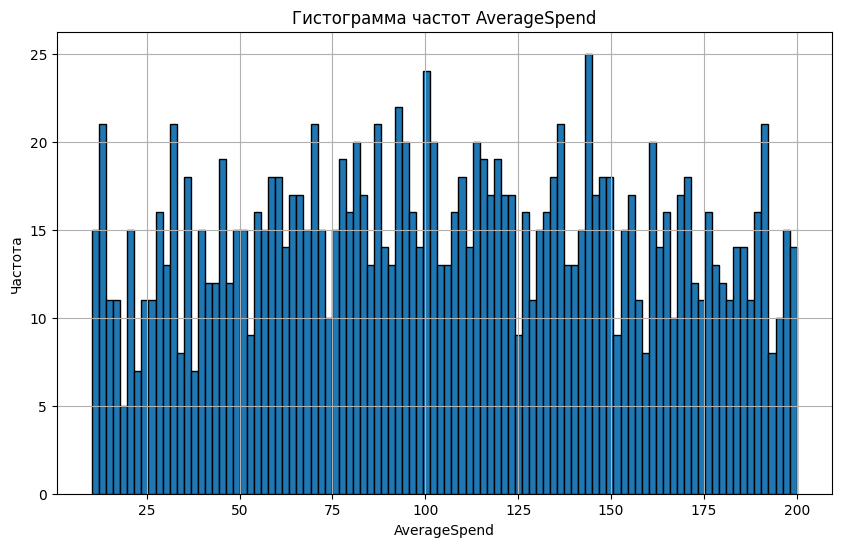

W-статистика: 0.9661766886711121
p-value: 3.042427575227455e-18
Данные AverageSpend не имеют нормального распределения



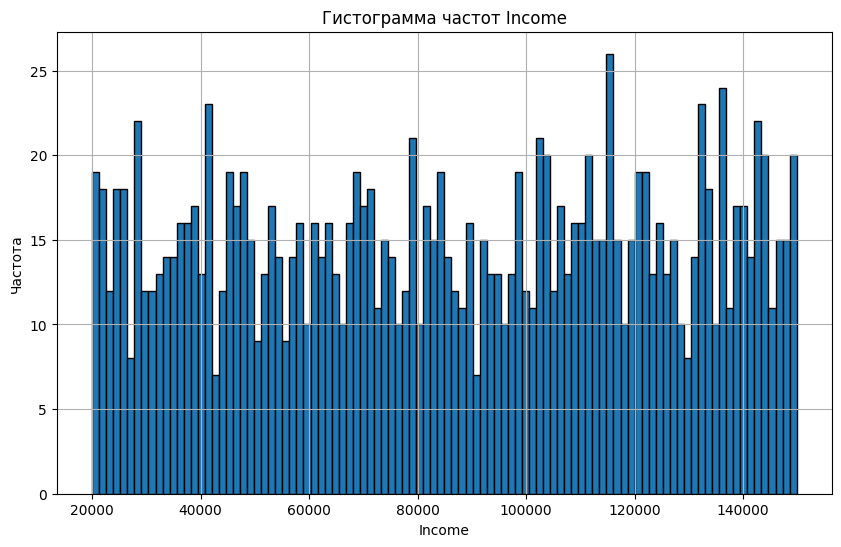

W-статистика: 0.9509305953979492
p-value: 5.487159946713762e-22
Данные Income не имеют нормального распределения

Коэффициент ранговой корреляции Спирмена: 0.013714089821370819
p-value: 0.5956082629343278
Коэффициент корреляции Кендалла: 0.009357407606899862
p-value: 0.5871440177473097

F-статистика: 1.1886888272230056
p-value: 0.3049077673696091
Нет оснований отвергать нулевую гипотезу: средние затраты не зависят от времени посещения.


In [1]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import f_oneway

dataset = '/content/predict-restaurant-customer-satisfaction-dataset.zip'

with ZipFile(dataset, 'r') as zip:
    zip.extractall()

data_file = 'restaurant_customer_satisfaction.csv'
df = pd.read_csv(data_file)

Spend = df['AverageSpend']
Income = df['Income']

# Построение гистограммы для AverageSpend
plt.figure(figsize=(10, 6))
plt.hist(df['AverageSpend'], bins=100, edgecolor='black')
plt.title('Гистограмма частот AverageSpend')
plt.xlabel('AverageSpend')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

#Тест Шапиро-Уилка для AverageSpend
w_statistic1, p_value1 = stats.shapiro(Spend)
print(f"W-статистика: {w_statistic1}")
print(f"p-value: {p_value1}")
if p_value1 > 0.05:
  print("Данные AverageSpend распределены нормально")
else:
  print("Данные AverageSpend не имеют нормального распределения")
print()

# Построение гистограммы для Income
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=100, edgecolor='black')
plt.title('Гистограмма частот Income')
plt.xlabel('Income')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

#Тест Шапиро-Уилка для Income
w_statistic2, p_value2 = stats.shapiro(Income)
print(f"W-статистика: {w_statistic2}")
print(f"p-value: {p_value2}")
if p_value1 > 0.05:
  print("Данные Income распределены нормально")
else:
  print("Данные Income не имеют нормального распределения")
print()

corr_spearman, p_value3  = spearmanr(df['AverageSpend'], df['Income'])
print(f"Коэффициент ранговой корреляции Спирмена: {corr_spearman}")
print(f"p-value: {p_value3}")

corr_kendall, p_value4 = kendalltau(df['AverageSpend'], df['Income'])
print(f"Коэффициент корреляции Кендалла: {corr_kendall}")
print(f"p-value: {p_value4}")
print()

# Группировка данных по времени посещения
morning_spend = df[df['TimeOfVisit'] == 'Breakfast']['AverageSpend']
afternoon_spend = df[df['TimeOfVisit'] == 'Lunch']['AverageSpend']
evening_spend = df[df['TimeOfVisit'] == 'Dinner']['AverageSpend']

# Проведение однофакторного дисперсионного анализа (ANOVA)
f_stat, p_value = f_oneway(morning_spend, afternoon_spend, evening_spend)
print(f"F-статистика: {f_stat}")
print(f"p-value: {p_value}")
if p_value > 0.05:
    print("Нет оснований отвергать нулевую гипотезу: средние затраты не зависят от времени посещения.")
else:
    print("Нулевая гипотеза отвергается: средние затраты зависят от времени посещения.")